# Exploratory Data Analysis Exercise with Pandas and Matplotlib

In this exercise, you are responsible for devleoping a data pipeline to ingest and analyze multi-state streamflow records from CSV files in our Canvas Class. This exercise will directly assist with HW #1. Filepath for the data:

    files -> Data -> NWIS_Streaflow -> <STATE>

You will download the data from Canvas and load it into a folder you create called "streamflow_data". Once within the repo, you will load the data into this python notebook and perform exploratory data analysis. After performing data cleaning and time-series alignment with Pandas, you will transition develop Matplotlib visualizations. The core of the assignment emphasizes the Matplotlib philosophy, challenging you to use powerful operators to link, overlay, and explore discharge trends across Idaho, Utah, and Wyoming.

The [USGS NWIS Mapper](https://apps.usgs.gov/nwismapper/) provides interactive mapping to locate sites and repective metadata.

## Task 1: Select, download, and bring the data into your notebook session

Use the [USGS NWIS Mapper](https://apps.usgs.gov/nwismapper/) to locate one site below a reservoir,  one site in a headwater catchment, and one site near a rivers terminus to the Great Salt Lake. Using this siteid, find the site data in the Canvas NWIS_Streamflow data folder, download it to your computer, then upload it to this repo into a folder named "streamflow_data". In the code block below, load the data into a Pandas DataFrame and inspect it as we previously did in the Pandas exercises (.head(), .describe()). Write down what you notice. Remove any outliers NaN values, and -999.

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#10141000 is the weber river before it enters the great salt lake 
#10130500 is the wever river below rockport
#10128500 is the weber river above rockport

#read the data from the streamflow_data folder 
terminus = pd.read_csv("streamflow_data/10141000_1980_2020.csv")
print(terminus.head())
terminus.describe()

#remove outliers, NaN values, and negative 999 values 
terminus = terminus[terminus['USGS_flow'] > 0]
# terminus = terminus[terminus['USGS_flow'] < 10000]
#remove values that are in the 99th percentile 
# q99 = terminus['USGS_flow'].quantile(0.9999)
# terminus = terminus[terminus['USGS_flow'] < q99]
terminus = terminus.dropna()
terminus.describe()

     Datetime  USGS_flow    variable   USGS_ID measurement_unit  \
0  1986-10-01   982.4000  streamflow  10141000            ft3/s   
1  1986-10-02   967.7083  streamflow  10141000            ft3/s   
2  1986-10-03   976.8750  streamflow  10141000            ft3/s   
3  1986-10-04   906.0000  streamflow  10141000            ft3/s   
4  1986-10-05   858.8125  streamflow  10141000            ft3/s   

      qualifiers  series  
0  ['A', '[91]']       0  
1  ['A', '[91]']       0  
2  ['A', '[91]']       0  
3  ['A', '[91]']       0  
4  ['A', '[91]']       0  


,USGS_flow,USGS_ID,series
count,11489.000000,11489.0,11489.0
mean,328.125434,10141000.0,0.0
std,565.554160,0.0,0.0
min,3.957083,10141000.0,0.0
25%,73.914580,10141000.0,0.0
50%,119.468750,10141000.0,0.0
75%,277.354160,10141000.0,0.0
max,5024.583500,10141000.0,0.0


In [34]:
#print the 10 rows before and after the maximum flow value
max_flow_rows = terminus.loc[max_flow_index-10:max_flow_index+10]
print(max_flow_rows)

        Datetime  USGS_flow    variable   USGS_ID measurement_unit qualifiers  \
9006  2011-05-29  4689.2710  streamflow  10141000            ft3/s      ['A']   
9007  2011-05-30  4911.8750  streamflow  10141000            ft3/s      ['A']   
9008  2011-05-31  5003.8540  streamflow  10141000            ft3/s      ['A']   
9009  2011-06-01  4821.3540  streamflow  10141000            ft3/s      ['A']   
9010  2011-06-02  4651.4585  streamflow  10141000            ft3/s      ['A']   
9011  2011-06-03  4667.5000  streamflow  10141000            ft3/s      ['A']   
9012  2011-06-04  4741.8750  streamflow  10141000            ft3/s      ['A']   
9013  2011-06-05  4793.2290  streamflow  10141000            ft3/s      ['A']   
9014  2011-06-06  4851.0415  streamflow  10141000            ft3/s      ['A']   
9015  2011-06-07  4981.5625  streamflow  10141000            ft3/s      ['A']   
9016  2011-06-08  5024.5835  streamflow  10141000            ft3/s      ['A']   
9017  2011-06-09  4936.1460 

In [36]:
res = pd.read_csv("streamflow_data/10130500_1980_2020.csv")
print(res.head())
res.describe()

#remove NaN values and negative 999 values
res = res[res['USGS_flow'] > 0]
res = res.dropna()
res.describe()

     Datetime  USGS_flow    variable   USGS_ID measurement_unit  \
0  1986-10-01  310.35294  streamflow  10130500            ft3/s   
1  1986-10-02  264.50000  streamflow  10130500            ft3/s   
2  1986-10-03  263.00000  streamflow  10130500            ft3/s   
3  1986-10-04  259.00000  streamflow  10130500            ft3/s   
4  1986-10-05  253.37500  streamflow  10130500            ft3/s   

      qualifiers  series  
0  ['A', '[91]']       0  
1  ['A', '[91]']       0  
2  ['A', '[91]']       0  
3  ['A', '[91]']       0  
4  ['A', '[91]']       0  


,USGS_flow,USGS_ID,series
count,9944.000000,9944.0,9944.0
mean,195.257736,10130500.0,0.0
std,201.431500,0.0,0.0
min,12.666667,10130500.0,0.0
25%,84.736981,10130500.0,0.0
50%,171.786460,10130500.0,0.0
75%,214.687500,10130500.0,0.0
max,1624.479100,10130500.0,0.0


In [35]:
#print the 10 rows before and after the maximum value
max_flow_rows_res = res.loc[max_flow_index-10:max_flow_index+10]
print(max_flow_rows_res)

        Datetime   USGS_flow    variable   USGS_ID measurement_unit  \
9006  2011-05-29  1138.64590  streamflow  10130500            ft3/s   
9007  2011-05-30  1140.00000  streamflow  10130500            ft3/s   
9008  2011-05-31  1113.02090  streamflow  10130500            ft3/s   
9009  2011-06-01  1077.70840  streamflow  10130500            ft3/s   
9010  2011-06-02  1092.39590  streamflow  10130500            ft3/s   
9011  2011-06-03  1182.91660  streamflow  10130500            ft3/s   
9012  2011-06-04  1167.91660  streamflow  10130500            ft3/s   
9013  2011-06-05  1164.89590  streamflow  10130500            ft3/s   
9014  2011-06-06  1164.16660  streamflow  10130500            ft3/s   
9015  2011-06-07  1169.89590  streamflow  10130500            ft3/s   
9016  2011-06-08  1216.66660  streamflow  10130500            ft3/s   
9017  2011-06-09  1206.45840  streamflow  10130500            ft3/s   
9018  2011-06-10  1197.60410  streamflow  10130500            ft3/s   
9019  

In [15]:
headwaters = pd.read_csv("streamflow_data/10128500_1980_2020.csv")
print(headwaters.head())
headwaters.describe()

     Datetime   USGS_flow    variable   USGS_ID measurement_unit  \
0  1986-10-02  123.111115  streamflow  10128500            ft3/s   
1  1986-10-03  130.916670  streamflow  10128500            ft3/s   
2  1986-10-04  122.250000  streamflow  10128500            ft3/s   
3  1986-10-05  118.083336  streamflow  10128500            ft3/s   
4  1986-10-06  118.000000  streamflow  10128500            ft3/s   

      qualifiers  series  
0          ['A']       0  
1  ['A', '[91]']       0  
2  ['A', '[91]']       0  
3  ['A', '[91]']       0  
4  ['A', '[91]']       0  


,USGS_flow,USGS_ID,series
count,9817.000000,12417.0,12417.0
mean,223.880842,10128500.0,0.0
std,325.184763,0.0,0.0
min,23.125000,10128500.0,0.0
25%,62.500000,10128500.0,0.0
50%,103.035710,10128500.0,0.0
75%,185.906250,10128500.0,0.0
max,2925.520800,10128500.0,0.0


In [37]:
#remove NaN values and negative 999 values
headwaters = headwaters[headwaters['USGS_flow'] > 0]
headwaters = headwaters.dropna()
headwaters.describe()

,USGS_flow,USGS_ID,series
count,9817.000000,9817.0,9817.0
mean,223.880842,10128500.0,0.0
std,325.184763,0.0,0.0
min,23.125000,10128500.0,0.0
25%,62.500000,10128500.0,0.0
50%,103.035710,10128500.0,0.0
75%,185.906250,10128500.0,0.0
max,2925.520800,10128500.0,0.0


In [38]:
max_flow_rows_headwaters = headwaters.loc[max_flow_index-10:max_flow_index+10]
print(max_flow_rows_headwaters)

        Datetime   USGS_flow    variable   USGS_ID measurement_unit  \
9006  2011-05-30   771.67706  streamflow  10128500            ft3/s   
9007  2011-05-31   726.23956  streamflow  10128500            ft3/s   
9008  2011-06-01   737.31250  streamflow  10128500            ft3/s   
9009  2011-06-02   791.75000  streamflow  10128500            ft3/s   
9010  2011-06-03   833.52080  streamflow  10128500            ft3/s   
9011  2011-06-04   870.92706  streamflow  10128500            ft3/s   
9012  2011-06-05   973.67706  streamflow  10128500            ft3/s   
9013  2011-06-06  1245.05260  streamflow  10128500            ft3/s   
9014  2011-06-07  1355.31250  streamflow  10128500            ft3/s   
9015  2011-06-08  1345.31250  streamflow  10128500            ft3/s   
9016  2011-06-09  1435.62500  streamflow  10128500            ft3/s   
9017  2011-06-10  1281.66660  streamflow  10128500            ft3/s   
9018  2011-06-11  1295.52090  streamflow  10128500            ft3/s   
9019  

## Task 2: Slicing and Dicing

We are interested in examining the data from 2000-2010. Slice the data accordingly and save it to a new Pandas DataFrame.

In [40]:
#slice the terminus data to only include the years 2000-2010 and save to a new dataframe called terminus_2000_2010
terminus_2000_2010 = terminus[(terminus['Datetime'] >= '2000-01-01') & (terminus['Datetime'] <= '2010-12-31')]
#do the same for res and headwaters
res_2000_2010 = res[(res['Datetime'] >= '2000-01-01') & (res['Datetime'] <= '2010-12-31')]
headwaters_2000_2010 = headwaters[(headwaters['Datetime'] >= '2000-01-01') & (headwaters['Datetime'] <= '2010-12-31')]

## Task 3: Create plots for each DataFrame using the df.plot() function

Use the built in functionality of Pandas to plot the time series of each stream.

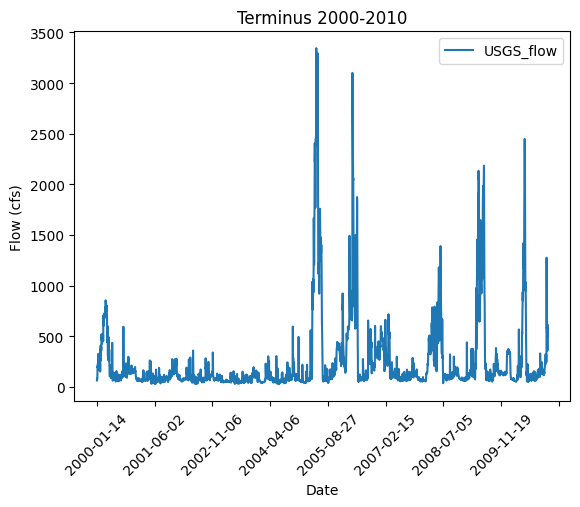

In [44]:
#plot terminus dataframe using df.plot() and show the plot
terminus_2000_2010.plot(x='Datetime', y='USGS_flow')
plt.title('Terminus 2000-2010')
plt.xlabel('Date')
plt.ylabel('Flow (cfs)')
#roate x-axis labels 45 degrees
plt.xticks(rotation=45)
plt.show()  


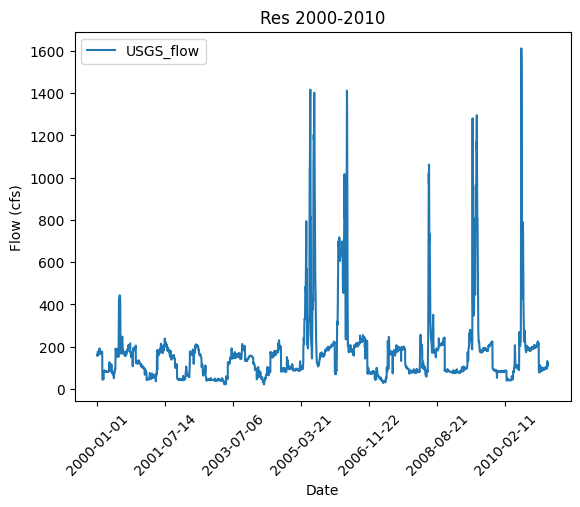

In [45]:
#plot res dataframe using df.plot() and show the plot
res_2000_2010.plot(x='Datetime', y='USGS_flow')
plt.title('Res 2000-2010')
plt.xlabel('Date')
plt.ylabel('Flow (cfs)')
#roate x-axis labels 45 degrees
plt.xticks(rotation=45)
plt.show()  


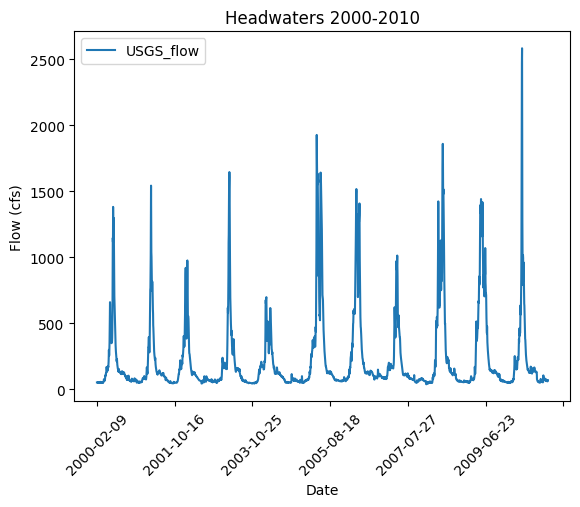

In [46]:
#plot headwaters dataframe using df.plot() and show the plot
headwaters_2000_2010.plot(x='Datetime', y='USGS_flow')
plt.title('Headwaters 2000-2010')
plt.xlabel('Date')
plt.ylabel('Flow (cfs)')
#roate x-axis labels 45 degrees
plt.xticks(rotation=45)
plt.show()  


## Task 4: Join/Merge Pandas DataFrames

Create a single dataframe named All_Streams and combine all streamflow monitoring data into this dataframe. Hint, set your index to the date. Create custom labels for each monitoring station location to communicate there location within the watershed (e.g, headwater, below reservoir, GSL Terminus). Print the dataframe.head() to demonstrate that is complete.

In [49]:

#create a single dataframe named All_Streams and combine the three dataframe streamflow data, with the index to the Datetime column, and the columns named Terminus, Res, and Headwaters
All_Streams = pd.DataFrame()
All_Streams['Datetime'] = terminus_2000_2010['Datetime']
All_Streams['Terminus'] = terminus_2000_2010['USGS_flow']
All_Streams['Below Res'] = res_2000_2010['USGS_flow']
All_Streams['Headwaters'] = headwaters_2000_2010['USGS_flow']
All_Streams.set_index('Datetime', inplace=True)
print(All_Streams.head(50))

              Terminus   Below Res  Headwaters
Datetime                                      
2000-01-14   63.720590  165.000000         NaN
2000-01-15   82.354164  164.312500         NaN
2000-01-16   78.822914  165.500000         NaN
2000-01-17   85.302086  176.781250         NaN
2000-01-18  108.125000  185.052080         NaN
2000-01-19  204.166670  190.802080         NaN
2000-01-20  192.520830  183.479170         NaN
2000-01-21  212.000000  184.145830         NaN
2000-01-22  229.572920  180.552080         NaN
2000-01-23  195.479170  174.302080         NaN
2000-01-24  165.125000  172.333330         NaN
2000-01-25  185.927080  173.291670         NaN
2000-01-26  326.791660  177.312500         NaN
2000-01-27  235.739580  173.510420         NaN
2000-01-28  229.718750  171.072920         NaN
2000-01-29  227.427080  174.614580         NaN
2000-01-30  238.177080  173.145830         NaN
2000-01-31  241.458330  165.906250         NaN
2000-02-01  255.708330  167.947920         NaN
2000-02-02  2

## Task 5: Demonstrate your Prowess with Matplotlib

Create a Four separate figures with all three stream on them:

* Figure 1 should be a single plot with all three stream  monitoring locations
* Figure 2 should be a single figure with subplots for each stream monitoring location. The subplots should be 2 rows and 2 columns
* Figure 3 should be a single figure with subplots for each stream monitoring location. The subplots should be 3 rows and 1 column 
* Figure 3 should be a single figure with subplots for each stream monitoring location. The subplots should be 1 row and 3 columns

Make sure your plots have the correct axes, labeled axes, a title, a legend. Create custom labels for each monitoring station location to communicate there location within the watershed (e.g, headwater, below reservoir, GSL Terminus).

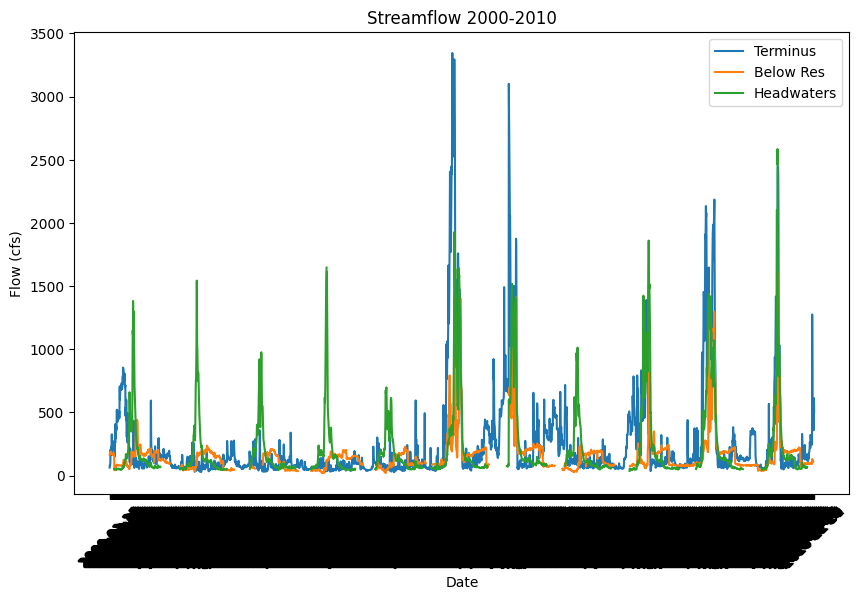

In [53]:
#create a figure using matplotlib and plot all three streamflow data on the same plot, with a legend, title, and axis labels, and the x axis shwoing by year
plt.figure(figsize=(10,6))
plt.plot(All_Streams.index, All_Streams['Terminus'], label='Terminus')
plt.plot(All_Streams.index, All_Streams['Below Res'], label='Below Res')
plt.plot(All_Streams.index, All_Streams['Headwaters'], label='Headwaters')
plt.title('Streamflow 2000-2010')
plt.xlabel('Date')
plt.ylabel('Flow (cfs)')
plt.legend()
#roate x-axis labels 45 degrees
plt.xticks(rotation=45)
plt.show()